## Retail Strategy and Analytics

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [146]:
file_path = '/Users/irasafonik/Desktop/quant/QVI_data.csv'

df = pd.read_csv(file_path)

df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [103]:
df.columns

Index(['LYLTY_CARD_NBR', 'DATE', 'STORE_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'PACK_SIZE', 'BRAND', 'LIFESTAGE',
       'PREMIUM_CUSTOMER'],
      dtype='object')

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


In [147]:
# Перетворення стовпця 'DATE' у формат дати
df['DATE'] = pd.to_datetime(df['DATE'])

# Створення стовпця 'YEARMONTH' у цілочисельному форматі
df['YEARMONTH'] = df['DATE'].dt.year * 100 + df['DATE'].dt.month

df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,YEARMONTH
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,201810
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,201809
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,201903
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,201903
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,201811


In [106]:
# Фільтруємо дані для попереднього періоду (до лютого 2019 року)
pre_trial_df = df[df['DATE'] < '2019-02-01']

# Групуємо дані за магазином і місяцем
monthly_metrics = pre_trial_df.groupby(['STORE_NBR', 'YEARMONTH']).agg(
    monthly_sales=('TOT_SALES', 'sum'),
    monthly_customers=('LYLTY_CARD_NBR', 'nunique'),
    monthly_transactions=('TXN_ID', 'nunique')
).reset_index()

# Фільтруємо магазини, які присутні протягом попереднього періоду
present_stores = monthly_metrics.groupby('STORE_NBR').size() == len(monthly_metrics['YEARMONTH'].unique())
control_stores = present_stores[present_stores].index.tolist()

# Виводимо контрольні магазини
print("Control stores:", control_stores)

Control stores: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 77, 78, 79, 80, 81, 82, 83, 84, 86, 87, 88, 89, 90, 91, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 207, 208, 209, 210, 212, 213, 214, 215, 216, 217, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 

In [107]:
# Calculate total sales and number of customers
measure_over_time = df.groupby(['STORE_NBR', 'YEARMONTH']).agg(
    totSales=('TOT_SALES', 'sum'),  # Total sales
    nCustomers=('LYLTY_CARD_NBR', 'nunique')  # Number of unique customers
).reset_index()

# Calculate total transactions
measure_over_time['nTxn'] = df.groupby(['STORE_NBR', 'YEARMONTH'])['TXN_ID'].nunique().reset_index(drop=True)

# Calculate transactions per customer
measure_over_time['nTxnPerCust'] = measure_over_time['nTxn'] / measure_over_time['nCustomers']

# Display the first few rows to verify the calculations
measure_over_time.head()

,STORE_NBR,YEARMONTH,totSales,nCustomers,nTxn,nTxnPerCust
0,1,201807,206.9,49,52,1.061224
1,1,201808,176.1,42,43,1.023810
2,1,201809,278.8,59,62,1.050847
3,1,201810,188.1,44,45,1.022727
4,1,201811,192.6,46,47,1.021739


In [108]:
# Фільтрація даних для вказаних магазинів
selected_stores = [77, 86, 88]
selected_store_data = df[df['STORE_NBR'].isin(selected_stores)]

# Обчислення загальних продажів, кількості клієнтів і кількості транзакцій за кожен місяць для вибраних магазинів
measure_over_time_selected = selected_store_data.groupby(['STORE_NBR', 'YEARMONTH']).agg(
    totSales=('TOT_SALES', 'sum'),  # Загальний обсяг продажів
    nCustomers=('LYLTY_CARD_NBR', 'nunique'),  # Кількість унікальних клієнтів
    nTxn=('TXN_ID', 'nunique')  # Кількість унікальних транзакцій
).reset_index()

# Обчислення кількості транзакцій на клієнта за кожен місяць
measure_over_time_selected['nTxnPerCust'] = measure_over_time_selected['nTxn'] / measure_over_time_selected['nCustomers']

# Вивід перших кількох рядків для перевірки обчислень
measure_over_time_selected.head()

,STORE_NBR,YEARMONTH,totSales,nCustomers,nTxn,nTxnPerCust
0,77,201807,296.8,51,55,1.078431
1,77,201808,255.5,47,48,1.021277
2,77,201809,225.2,42,44,1.047619
3,77,201810,204.5,37,38,1.027027
4,77,201811,245.3,41,44,1.073171


In [110]:
# Фільтрація за передвипробним періодом і магазинами з повними періодами спостережень
stores_with_full_obs = measure_over_time.groupby('STORE_NBR').size()[measure_over_time.groupby('STORE_NBR').size() == 12].index.tolist()
pre_trial_measures = measure_over_time[(measure_over_time['YEARMONTH'] < 201902) & (measure_over_time['STORE_NBR'].isin(stores_with_full_obs))]
pre_trial_measures

,STORE_NBR,YEARMONTH,totSales,nCustomers,nTxn,nTxnPerCust
0,1,201807,206.9,49,52,1.061224
1,1,201808,176.1,42,43,1.023810
2,1,201809,278.8,59,62,1.050847
3,1,201810,188.1,44,45,1.022727
4,1,201811,192.6,46,47,1.021739
...,...,...,...,...,...,...
3159,272,201809,304.7,32,36,1.125000
3160,272,201810,430.6,44,50,1.136364
3161,272,201811,376.2,41,45,1.097561
3162,272,201812,403.9,47,47,1.000000


### Now we need to work out a way of ranking how similar each potential control store is to the trial store. We can calculate how correlated the performance of each store is to the trial store.

In [148]:
def calculate_correlation(input_table, metric_col, store_comparison):
    # Створення нової таблиці для зберігання результатів
    calc_corr_table = pd.DataFrame(columns=['Store1', 'Store2', 'corr_measure'])
    
    # Отримання унікальних номерів магазинів
    store_numbers = input_table['STORE_NBR'].unique()
    
    # Перевірка чи відсутні пропущені значення у вхідних даних
    if input_table[metric_col].isnull().any():
        print("Warning: Missing values detected in the metric column. These rows will be excluded from correlation calculation.")
    
    # Цикл для обчислення кореляції для кожного магазину
    for i in store_numbers:
        # Перевірка чи є достатня кількість даних для обчислення кореляції
        if len(input_table.loc[input_table['STORE_NBR'] == store_comparison, metric_col]) < 2 or len(input_table.loc[input_table['STORE_NBR'] == i, metric_col]) < 2:
            print(f"Warning: Insufficient data for correlation calculation between store {store_comparison} and store {i}. Skipping.")
            continue
        
        # Обчислення кореляції між магазином для порівняння і поточним магазином
        correlation = input_table.loc[input_table['STORE_NBR'] == store_comparison, metric_col].corr(input_table.loc[input_table['STORE_NBR'] == i, metric_col])
        
        # Додавання обчисленої кореляції до таблиці результатів
        calculated_measure = pd.DataFrame({
            'Store1': [store_comparison],
            'Store2': [i],
            'corr_measure': [correlation]
        })
        calc_corr_table = pd.concat([calc_corr_table, calculated_measure], ignore_index=True)
    
    # Повернення таблиці з обчисленими кореляціями
    return calc_corr_table

### Apart from correlation, we can also calculate a standardised metric based on the absolute difference be- tween the trial store’s performance and each control store’s performance. 

In [ ]:
def calculate_magnitude_distance(input_table, metric_col, store_comparison):
    # Створення пустої таблиці для зберігання результатів
    calc_dist_table = pd.DataFrame(columns=['Store1', 'Store2', 'YEARMONTH', 'measure'])
    
    # Отримання унікальних номерів магазинів
    store_numbers = input_table['STORE_NBR'].unique()
    
    # Цикл для обчислення відстані для кожного магазину
    for i in store_numbers:
        # Обчислення відстані між магазином для порівняння і поточним магазином
        common_months = set(input_table.loc[input_table['STORE_NBR'] == store_comparison, 'YEARMONTH']).intersection(input_table.loc[input_table['STORE_NBR'] == i, 'YEARMONTH'])
        for month in common_months:
            # Обчислення відстані для кожного спільного місяця
            distance = abs(input_table.loc[(input_table['STORE_NBR'] == store_comparison) & (input_table['YEARMONTH'] == month), metric_col].values[0] - input_table.loc[(input_table['STORE_NBR'] == i) & (input_table['YEARMONTH'] == month), metric_col].values[0])
            calculated_measure = pd.DataFrame({
                'Store1': [store_comparison],
                'Store2': [i],
                'YEARMONTH': [month],
                'measure': [distance]
            })
            # Додавання обчисленої відстані до таблиці результатів
            calc_dist_table = pd.concat([calc_dist_table, calculated_measure], ignore_index=True)
    
    # Стандартизація відстані, щоб вона знаходилася в діапазоні від 0 до 1
    min_max_dist = calc_dist_table.groupby(['Store1', 'YEARMONTH'])['measure'].agg(['min', 'max']).reset_index()
    dist_table = pd.merge(calc_dist_table, min_max_dist, on=['Store1', 'YEARMONTH'], suffixes=('', '_range'))
    dist_table['magnitude_measure'] = 1 - (dist_table['measure'] - dist_table['min']) / (dist_table['max'] - dist_table['min'])
    
    # Обчислення середньої відстані для кожної пари магазинів
    final_dist_table = dist_table.groupby(['Store1', 'Store2'])['magnitude_measure'].mean().reset_index()
    
    return final_dist_table

### Now let’s use the functions to find the control stores! We’ll select control stores based on how similar monthly total sales in dollar amounts and monthly number of customers are to the trial stores. So we will need to use our functions to get four scores, two for each of total sales and total customers.

In [151]:
# Номер магазину для випробування
trial_store = 89

# Обчислення кореляції за кількістю продажів
corr_nSales = calculate_correlation(pre_trial_measures, 'totSales', trial_store)

# Обчислення кореляції за кількістю клієнтів
corr_nCustomers = calculate_correlation(pre_trial_measures, 'nCustomers', trial_store)

# Обчислення величини відстані за кількістю продажів
magnitude_nSales = calculate_magnitude_distance(pre_trial_measures, 'totSales', trial_store)

# Обчислення величини відстані за кількістю клієнтів
magnitude_nCustomers = calculate_magnitude_distance(pre_trial_measures, 'nCustomers', trial_store)

# Виведення результатів кореляції за кількістю продажів
print("Кореляція за кількістю продажів:")
print(corr_nSales)

# Виведення результатів кореляції за кількістю клієнтів
print("\nКореляція за кількістю клієнтів:")
print(corr_nCustomers)

# Виведення результатів величини відстані за кількістю продажів
print("\nВеличина відстані за кількістю продажів:")
print(magnitude_nSales)

# Виведення результатів величини відстані за кількістю клієнтів
print("\nВеличина відстані за кількістю клієнтів:")
print(magnitude_nCustomers)

Кореляція за кількістю продажів:
   Store1 Store2  corr_measure
0      89      1           NaN
0      89      2           NaN
0      89      3           NaN
0      89      4           NaN
0      89      5           NaN
..    ...    ...           ...
0      89    268           NaN
0      89    269           NaN
0      89    270           NaN
0      89    271           NaN
0      89    272           NaN

[260 rows x 3 columns]

Кореляція за кількістю клієнтів:
   Store1 Store2  corr_measure
0      89      1           NaN
0      89      2           NaN
0      89      3           NaN
0      89      4           NaN
0      89      5           NaN
..    ...    ...           ...
0      89    268           NaN
0      89    269           NaN
0      89    270           NaN
0      89    271           NaN
0      89    272           NaN

[260 rows x 3 columns]

Величина відстані за кількістю продажів:
     Store1  Store2  magnitude_measure
0        89       1           0.966837
1        89       2  

In [153]:
# Вага кореляції
corr_weight = 0.5

# Об'єднання таблиць кореляції і величини для кількості продажів
score_nSales = pd.merge(corr_nSales, magnitude_nSales, on=['Store1', 'Store2'])
score_nSales['scoreNSales'] = score_nSales['corr_measure'] * corr_weight + score_nSales['magnitude_measure'] * (1 - corr_weight)

# Об'єднання таблиць кореляції і величини для кількості клієнтів
score_nCustomers = pd.merge(corr_nCustomers, magnitude_nCustomers, on=['Store1', 'Store2'])
score_nCustomers['scoreNCust'] = score_nCustomers['corr_measure'] * corr_weight + score_nCustomers['magnitude_measure'] * (1 - corr_weight)

In [156]:
score_nSales

,Store1,Store2,corr_measure,magnitude_measure,scoreNSales
0,89,1,NaN,0.966837,NaN
1,89,2,NaN,0.968338,NaN
2,89,3,NaN,0.343427,NaN
3,89,4,NaN,0.168917,NaN
4,89,5,NaN,0.534974,NaN
...,...,...,...,...,...
255,89,268,NaN,0.961741,NaN
256,89,269,NaN,0.435563,NaN
257,89,270,NaN,0.432714,NaN
258,89,271,NaN,0.534133,NaN


In [157]:
score_nCustomers

,Store1,Store2,corr_measure,magnitude_measure,scoreNCust
0,89,1,NaN,0.910712,NaN
1,89,2,NaN,0.925679,NaN
2,89,3,NaN,0.35366,NaN
3,89,4,NaN,0.185702,NaN
4,89,5,NaN,0.493116,NaN
...,...,...,...,...,...
255,89,268,NaN,0.92226,NaN
256,89,269,NaN,0.347154,NaN
257,89,270,NaN,0.364194,NaN
258,89,271,NaN,0.493402,NaN


In [168]:
control_store = score_nCustomers[score_nCustomers['Store1'] == trial_store].sort_values(by='scoreNCust', ascending=False).iloc[1]['Store2']
print(control_store)

1


#### Visual checks on trends based on the drivers

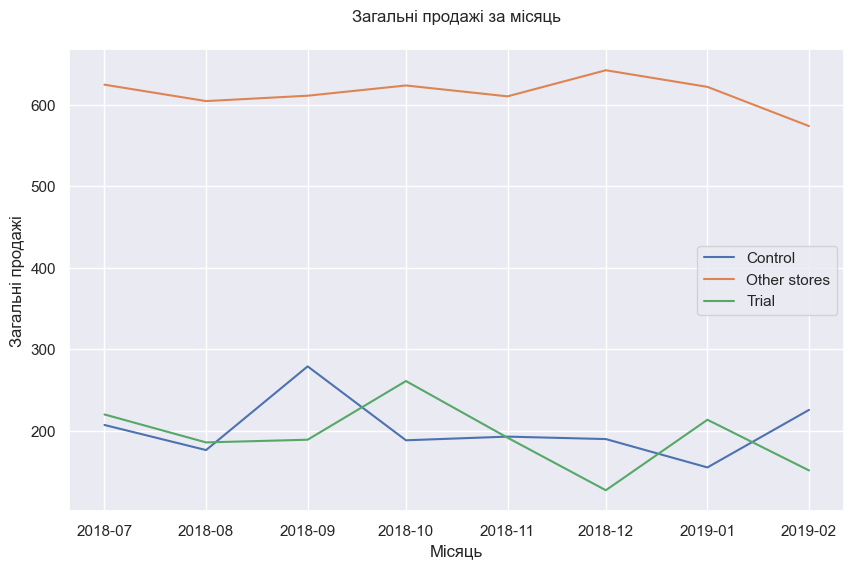

In [169]:
# Створення копії таблиці для обробки продажів
measure_over_time_sales = measure_over_time.copy()

# Додавання стовпця 'Store_type' для визначення типу магазину
measure_over_time_sales['Store_type'] = measure_over_time_sales['STORE_NBR'].apply(lambda x: 'Trial' if x == trial_store else ('Control' if x == control_store else 'Other stores'))

# Зміна формату дати
measure_over_time_sales['TransactionMonth'] = pd.to_datetime(measure_over_time_sales['YEARMONTH'].astype(str), format='%Y%m')

# Обчислення середніх продажів за кожний місяць
past_sales = measure_over_time_sales[measure_over_time_sales['YEARMONTH'] < 201903]
past_sales = past_sales.groupby(['TransactionMonth', 'Store_type'])['totSales'].mean().reset_index()

# Побудова графіка
plt.figure(figsize=(10, 6))
for store_type in past_sales['Store_type'].unique():
    plt.plot(past_sales[past_sales['Store_type'] == store_type]['TransactionMonth'], 
             past_sales[past_sales['Store_type'] == store_type]['totSales'], 
             label=store_type)
plt.xlabel('Місяць')
plt.ylabel('Загальні продажі')
plt.title('Загальні продажі за місяць')
plt.legend()
plt.show()

#### Visual checks on trends based on the drivers

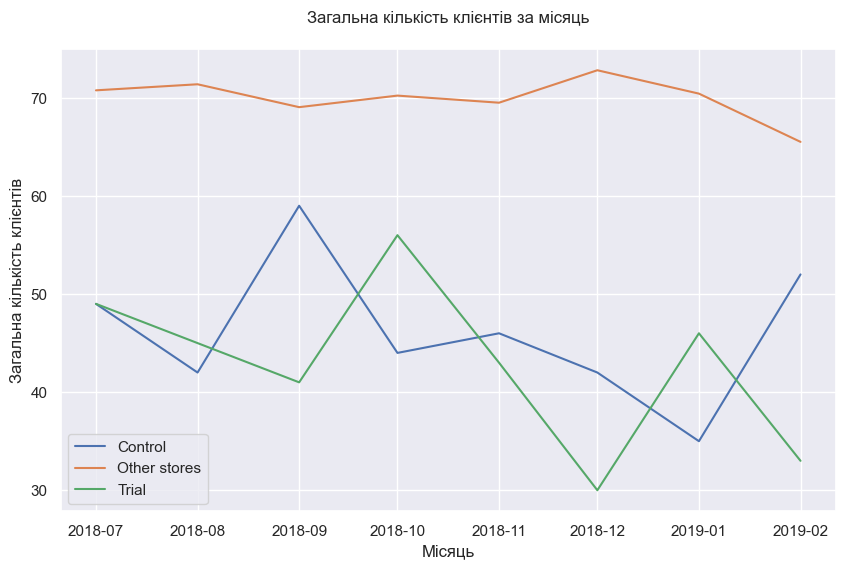

In [171]:
# Створення копії таблиці для обробки клієнтів
measure_over_time_custs = measure_over_time.copy()

# Додавання стовпця 'Store_type' для визначення типу магазину
measure_over_time_custs['Store_type'] = measure_over_time_custs['STORE_NBR'].apply(lambda x: 'Trial' if x == trial_store else ('Control' if x == control_store else 'Other stores'))

# Перетворення стовпця 'YEARMONTH' у формат дати
measure_over_time_custs['TransactionMonth'] = pd.to_datetime(measure_over_time_custs['YEARMONTH'], format='%Y%m')

# Обчислення середньої кількості клієнтів за кожний місяць
past_customers = measure_over_time_custs[measure_over_time_custs['YEARMONTH'] < 201903]
past_customers = past_customers.groupby(['TransactionMonth', 'Store_type'])['nCustomers'].mean().reset_index()

# Побудова графіка
plt.figure(figsize=(10, 6))
for store_type in past_customers['Store_type'].unique():
    plt.plot(past_customers[past_customers['Store_type'] == store_type]['TransactionMonth'], 
             past_customers[past_customers['Store_type'] == store_type]['nCustomers'], 
             label=store_type)
plt.xlabel('Місяць')
plt.ylabel('Загальна кількість клієнтів')
plt.title('Загальна кількість клієнтів за місяць')
plt.legend()
plt.show()


## Assessment of trial

####  The trial period goes from the start of March 2019 to June 2019. We now want to see if there has been an uplift in overall chip sales. We’ll start with scaling the control store’s sales to a level similar to control for any differences between the two stores outside of the trial period.

In [177]:
# Обчислення масштабного коефіцієнта для контрольних продажів
scaling_factor_for_control_sales = pre_trial_measures[(pre_trial_measures['STORE_NBR'] == trial_store) & (pre_trial_measures['YEARMONTH'] < 201902)]['totSales'].sum() / pre_trial_measures[(pre_trial_measures['STORE_NBR'] == control_store) & (pre_trial_measures['YEARMONTH'] < 201902)]['totSales'].sum()

# Застосування масштабного коефіцієнта
measure_over_time_sales = measure_over_time.copy()
measure_over_time_sales.loc[measure_over_time_sales['STORE_NBR'] == control_store, 'controlSales'] = measure_over_time_sales.loc[measure_over_time_sales['STORE_NBR'] == control_store, 'totSales'] * scaling_factor_for_control_sales

print(measure_over_time_sales[measure_over_time_sales['STORE_NBR'] == control_store])

    STORE_NBR  YEARMONTH  totSales  nCustomers  nTxn  nTxnPerCust  \
0           1     201807     206.9          49    52     1.061224   
1           1     201808     176.1          42    43     1.023810   
2           1     201809     278.8          59    62     1.050847   
3           1     201810     188.1          44    45     1.022727   
4           1     201811     192.6          46    47     1.021739   
5           1     201812     189.6          42    47     1.119048   
6           1     201901     154.8          35    36     1.028571   
7           1     201902     225.4          52    55     1.057692   
8           1     201903     192.9          45    49     1.088889   
9           1     201904     192.9          42    43     1.023810   
10          1     201905     221.4          46    51     1.108696   
11          1     201906     174.1          42    42     1.000000   

    controlSales  
0     206.810491  
1     176.023816  
2     278.679386  
3     188.018624  
4     1